In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../outputs/tulum_temp_precip_timeseries.csv')
df['date'] = pd.to_datetime(df['date'])


In [7]:
df['precipitation_mm'] = df['precipitation'] * 1000

# Estandarizar las variables
tmin_std = (df['tmin'] - df['tmin'].mean()) / df['tmin'].std()
precip_std = (df['precipitation_mm'] - df['precipitation_mm'].mean()) / df['precipitation_mm'].std()

# Índice compuesto: valores negativos de temp (frío) y positivos de precipitación son "malos"
df['bad_weather_index'] = (-tmin_std + precip_std) / 2

# Clasificar días basado en percentiles del índice
p90 = np.percentile(df['bad_weather_index'], 90)
p95 = np.percentile(df['bad_weather_index'], 95)
p99 = np.percentile(df['bad_weather_index'], 99)

df['day_type'] = 'Normal'
df.loc[df['bad_weather_index'] > p90, 'day_type'] = 'Bad'
df.loc[df['bad_weather_index'] > p95, 'day_type'] = 'Very Bad'
df.loc[df['bad_weather_index'] > p99, 'day_type'] = 'Extreme'

print("Thresholds for bad weather index:")
print(f"90th percentile: {p90:.2f}")
print(f"95th percentile: {p95:.2f}")
print(f"99th percentile: {p99:.2f}")


Thresholds for bad weather index:
90th percentile: 0.89
95th percentile: 1.22
99th percentile: 1.97


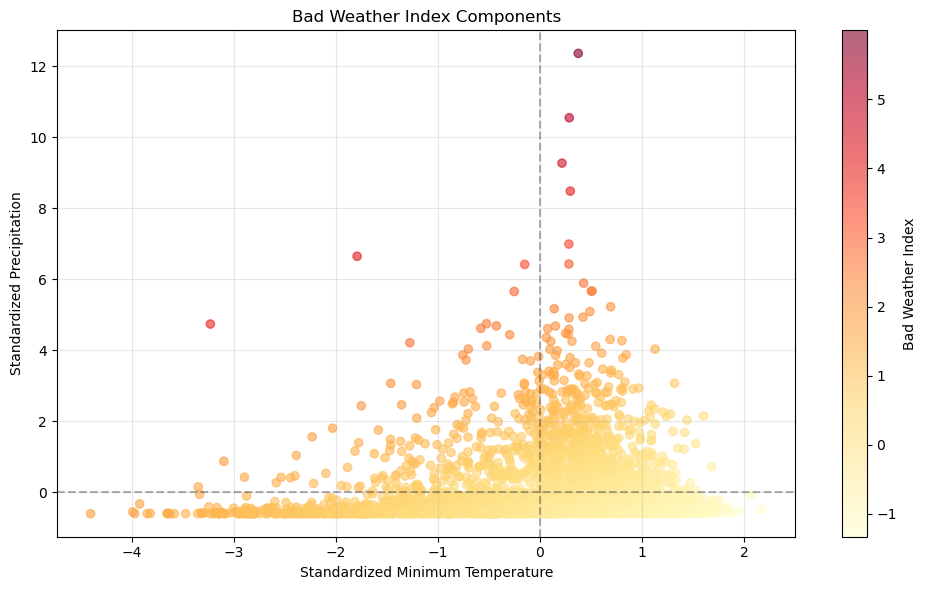

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(tmin_std, precip_std, c=df['bad_weather_index'], cmap='YlOrRd', alpha=0.6)
plt.colorbar(label='Bad Weather Index')
plt.xlabel('Standardized Minimum Temperature')
plt.ylabel('Standardized Precipitation')
plt.axvline(0, color='k', linestyle='--', alpha=0.3)
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Bad Weather Index Components')
plt.tight_layout()


In [9]:
extreme_days = df[df['day_type'] != 'Normal'].sort_values('bad_weather_index', ascending=False)
print("Top 10 worst weather days:")
print(extreme_days[['date', 'tmin', 'precipitation_mm', 'bad_weather_index', 'day_type']].head(10).to_string(float_format=lambda x: '{:.2f}'.format(x)))


Top 10 worst weather days:
           date  tmin  precipitation_mm  bad_weather_index day_type
3473 2024-07-05 25.74             14.55               6.00  Extreme
2102 2020-10-03 25.57             12.51               5.13  Extreme
2106 2020-10-07 25.43             11.08               4.53  Extreme
1559 2019-04-09 21.53              8.14               4.22  Extreme
2126 2020-10-27 25.59             10.19               4.10  Extreme
1487 2019-01-27 18.74              5.99               3.99  Extreme
3555 2024-09-25 25.56              8.52               3.36  Extreme
164  2015-06-14 24.72              7.88               3.29  Extreme
2105 2020-10-06 25.56              7.89               3.08  Extreme
163  2015-06-13 24.52              7.02               2.96  Extreme


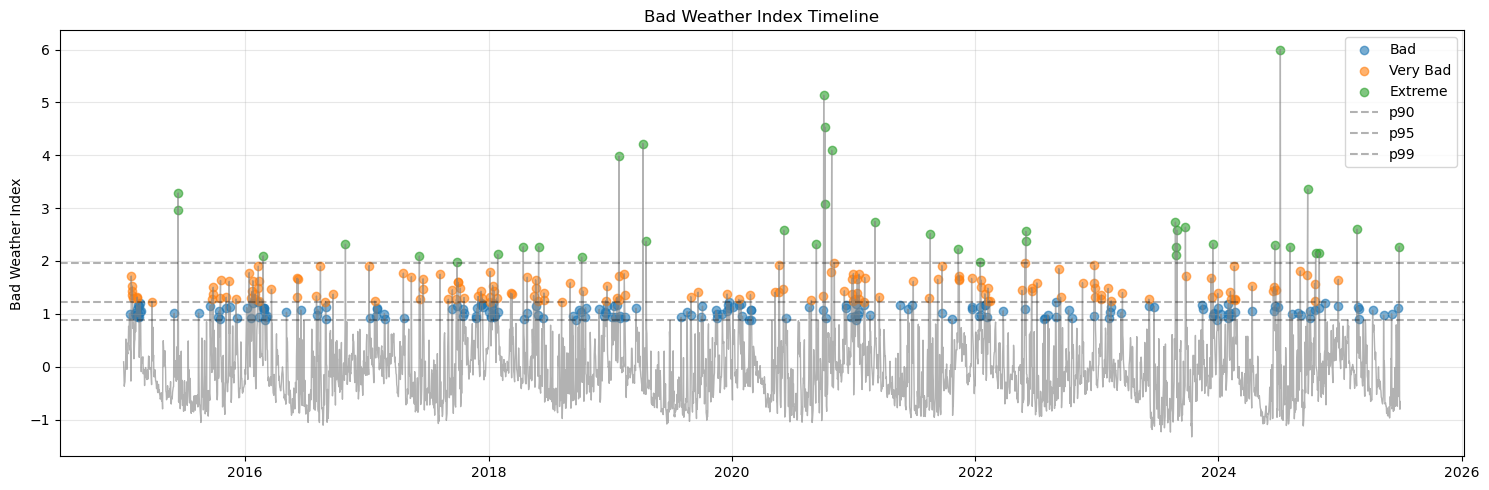

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['bad_weather_index'], alpha=0.6, color='gray', linewidth=1)
plt.scatter(df[df['day_type'] == 'Bad']['date'], 
           df[df['day_type'] == 'Bad']['bad_weather_index'], 
           label='Bad', alpha=0.6)
plt.scatter(df[df['day_type'] == 'Very Bad']['date'], 
           df[df['day_type'] == 'Very Bad']['bad_weather_index'], 
           label='Very Bad', alpha=0.6)
plt.scatter(df[df['day_type'] == 'Extreme']['date'], 
           df[df['day_type'] == 'Extreme']['bad_weather_index'], 
           label='Extreme', alpha=0.6)

plt.axhline(p90, color='k', linestyle='--', alpha=0.3, label='p90')
plt.axhline(p95, color='k', linestyle='--', alpha=0.3, label='p95')
plt.axhline(p99, color='k', linestyle='--', alpha=0.3, label='p99')

plt.ylabel('Bad Weather Index')
plt.title('Bad Weather Index Timeline')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()


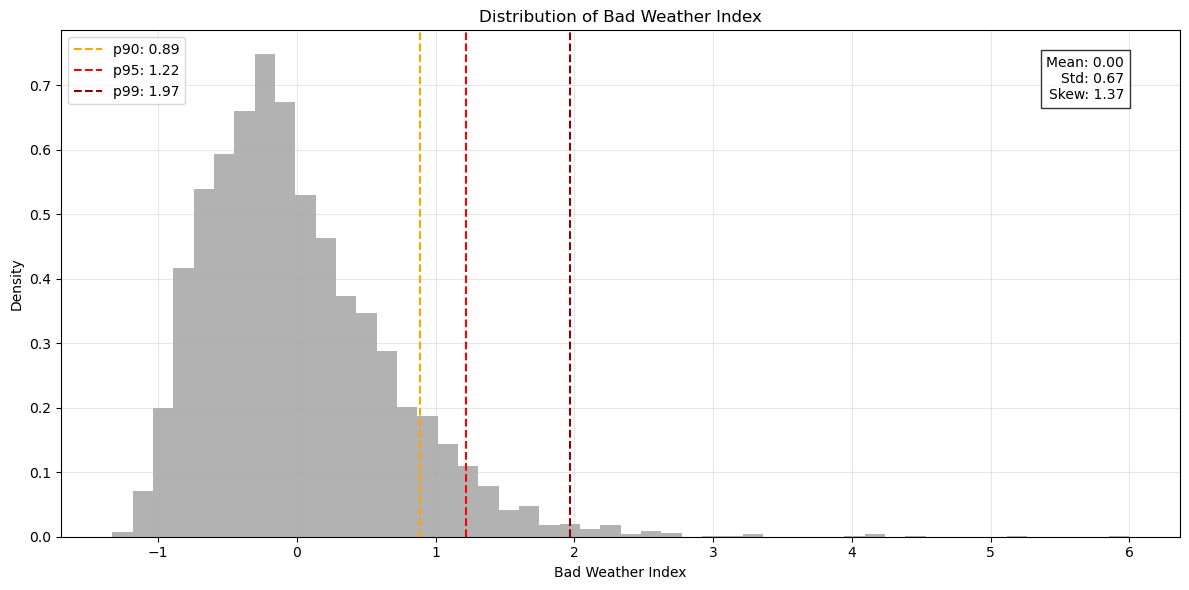

In [11]:
plt.figure(figsize=(12, 6))

plt.hist(df['bad_weather_index'], bins=50, alpha=0.6, color='gray', density=True)

# Agregar líneas verticales para los percentiles
plt.axvline(p90, color='orange', linestyle='--', label=f'p90: {p90:.2f}')
plt.axvline(p95, color='red', linestyle='--', label=f'p95: {p95:.2f}')
plt.axvline(p99, color='darkred', linestyle='--', label=f'p99: {p99:.2f}')

# Agregar texto con estadísticas básicas
stats_text = f'Mean: {df["bad_weather_index"].mean():.2f}\n'
stats_text += f'Std: {df["bad_weather_index"].std():.2f}\n'
stats_text += f'Skew: {df["bad_weather_index"].skew():.2f}'
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.title('Distribution of Bad Weather Index')
plt.xlabel('Bad Weather Index')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
